In [1]:
# Loading the House dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [3]:
df = pd.read_excel(r"C:\Job_Assignment\DS - Assignment Part 1 data set.xlsx")
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [4]:
# Dropping Transaction date Column

In [5]:
df.drop(['Transaction date'], axis = 1, inplace = True)

In [6]:
# Checking for missing value.

In [7]:
df.isnull().any()

House Age                                   False
Distance from nearest Metro station (km)    False
Number of convenience stores                False
latitude                                    False
longitude                                   False
Number of bedrooms                          False
House size (sqft)                           False
House price of unit area                    False
dtype: bool

In [8]:
# Checking dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   House Age                                 414 non-null    float64
 1   Distance from nearest Metro station (km)  414 non-null    float64
 2   Number of convenience stores              414 non-null    int64  
 3   latitude                                  414 non-null    float64
 4   longitude                                 414 non-null    float64
 5   Number of bedrooms                        414 non-null    int64  
 6   House size (sqft)                         414 non-null    int64  
 7   House price of unit area                  414 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 26.0 KB


In [9]:
# Describing dataframe
df.describe()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [10]:
# Plotting Pairplot to do the Bivariate analysis of each pair of features

C:\Users\sangita\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


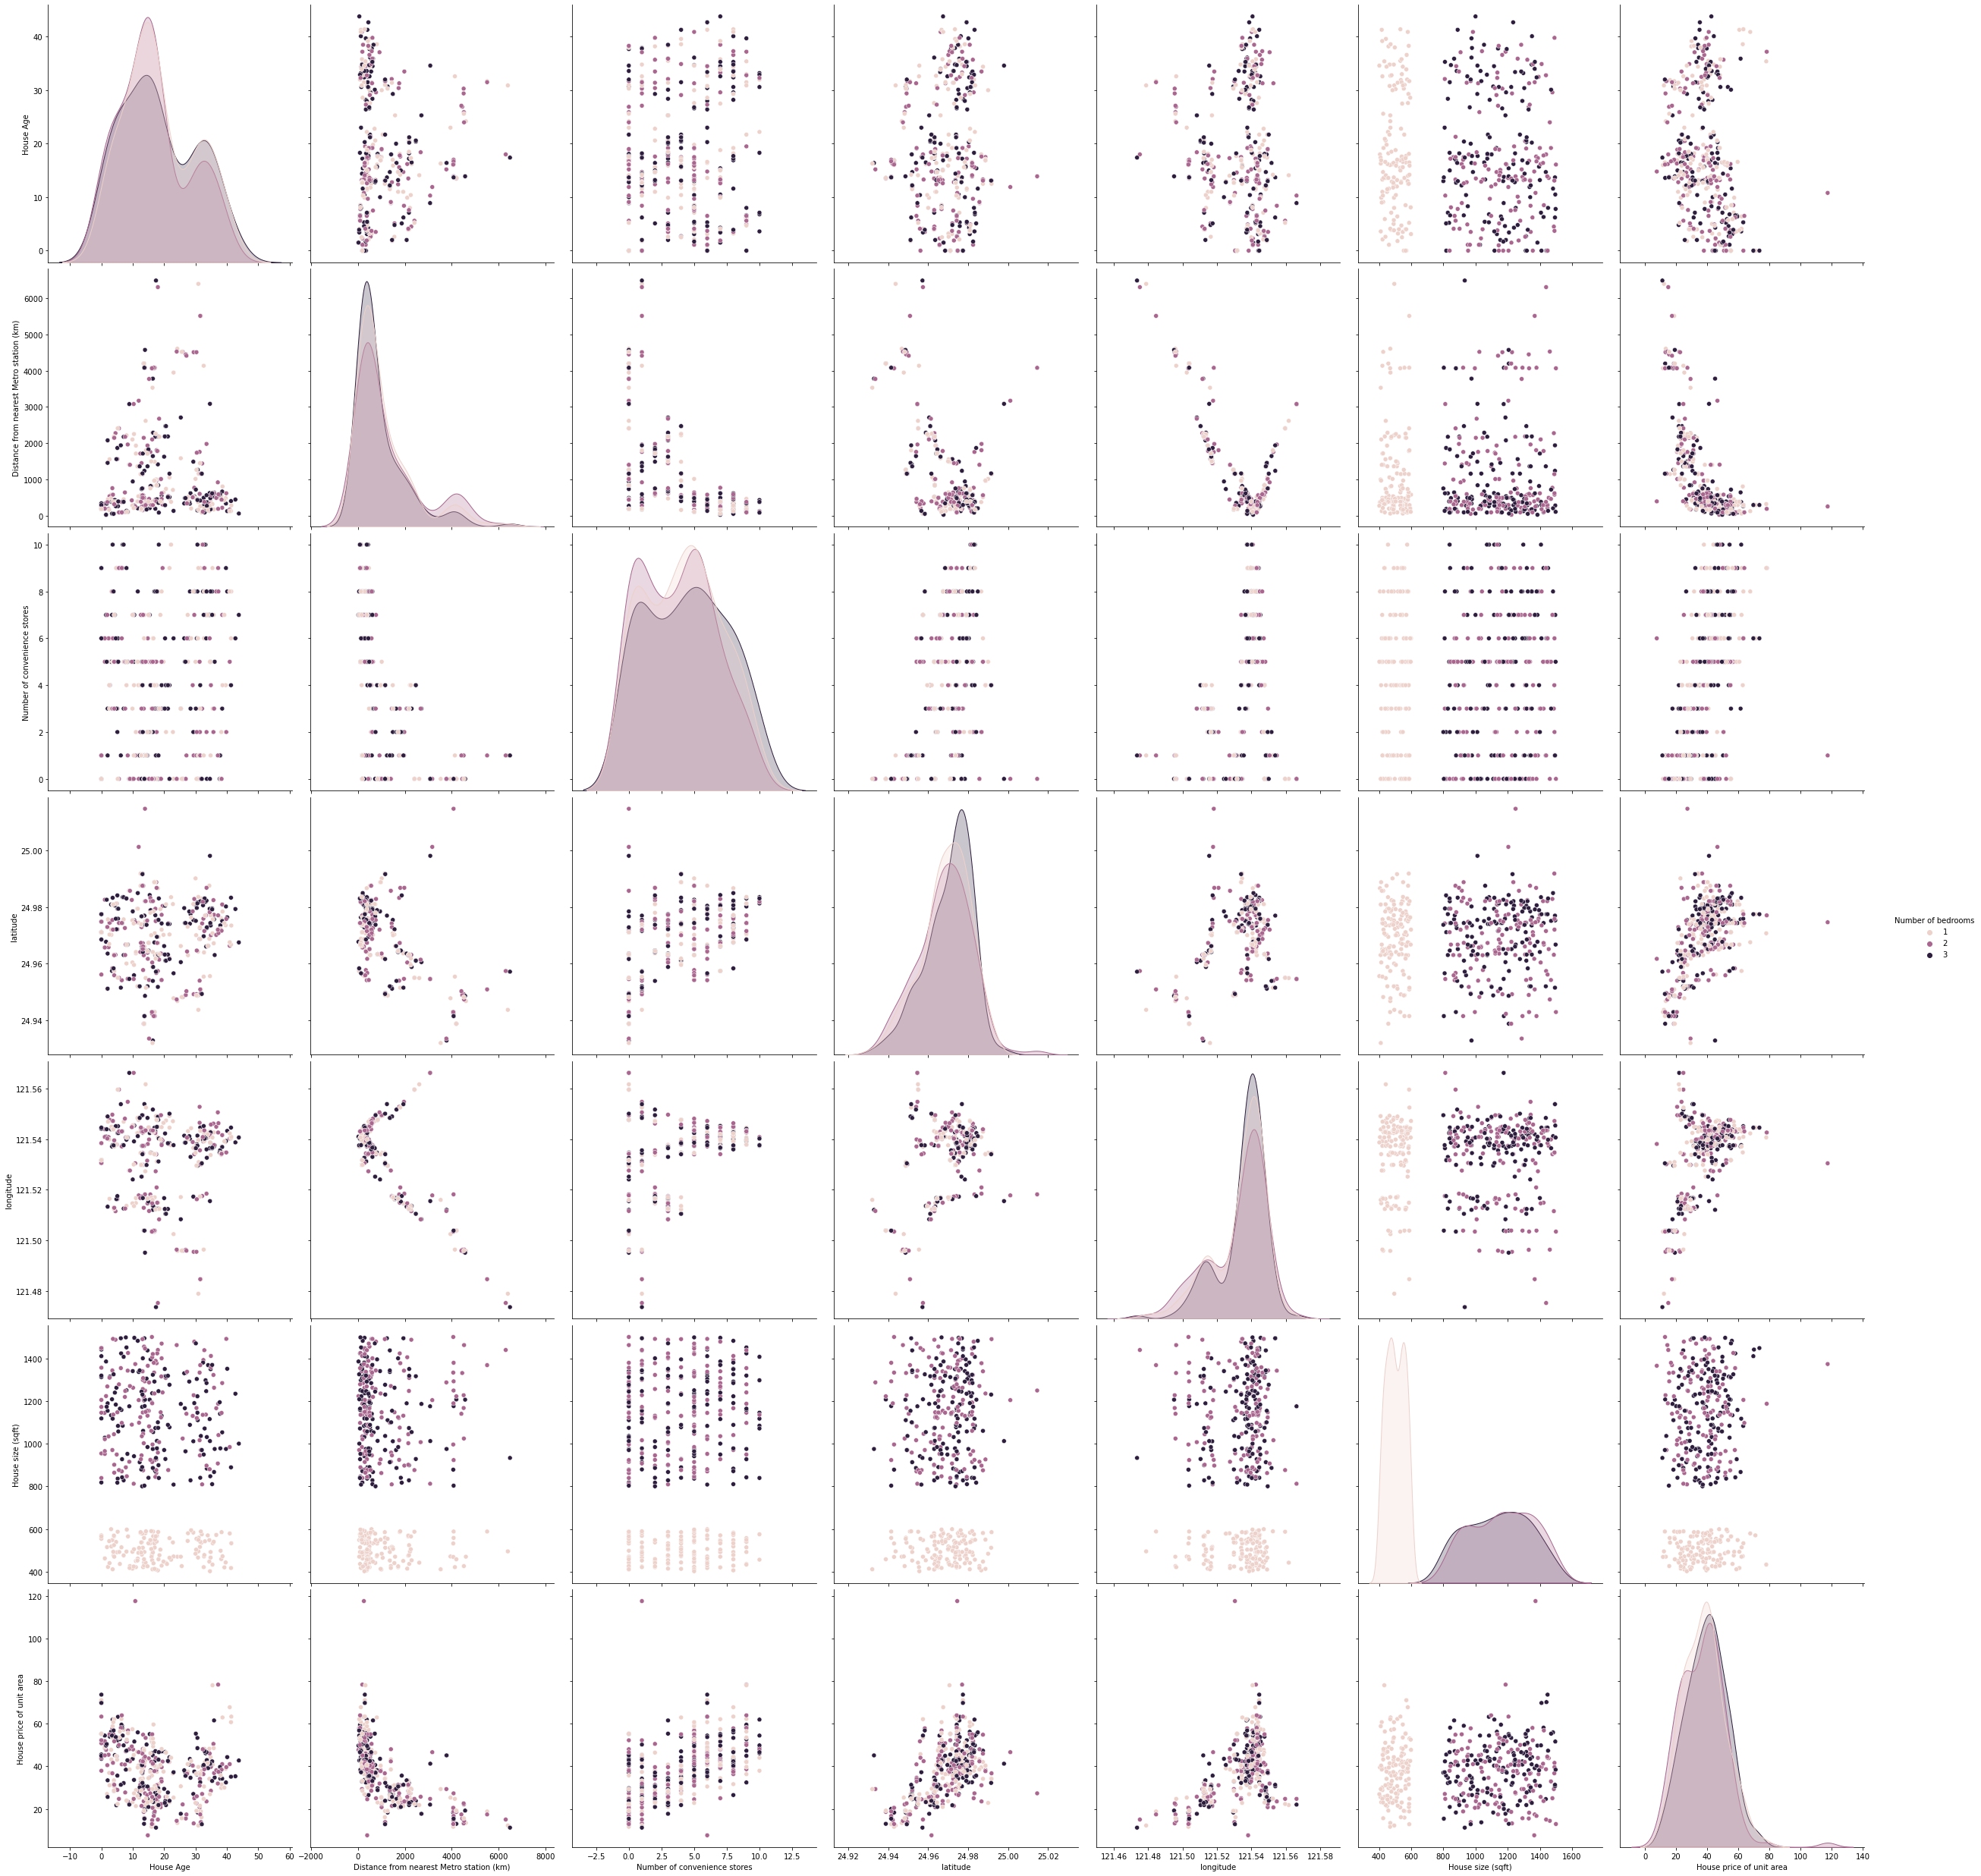

In [11]:
sns.pairplot(df, hue ="Number of bedrooms", size = 5, diag_kind="kde")

C:\Users\sangita\AppData\Local\Temp/ipykernel_13812/4228055017.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(dfc, dtype=np.bool)


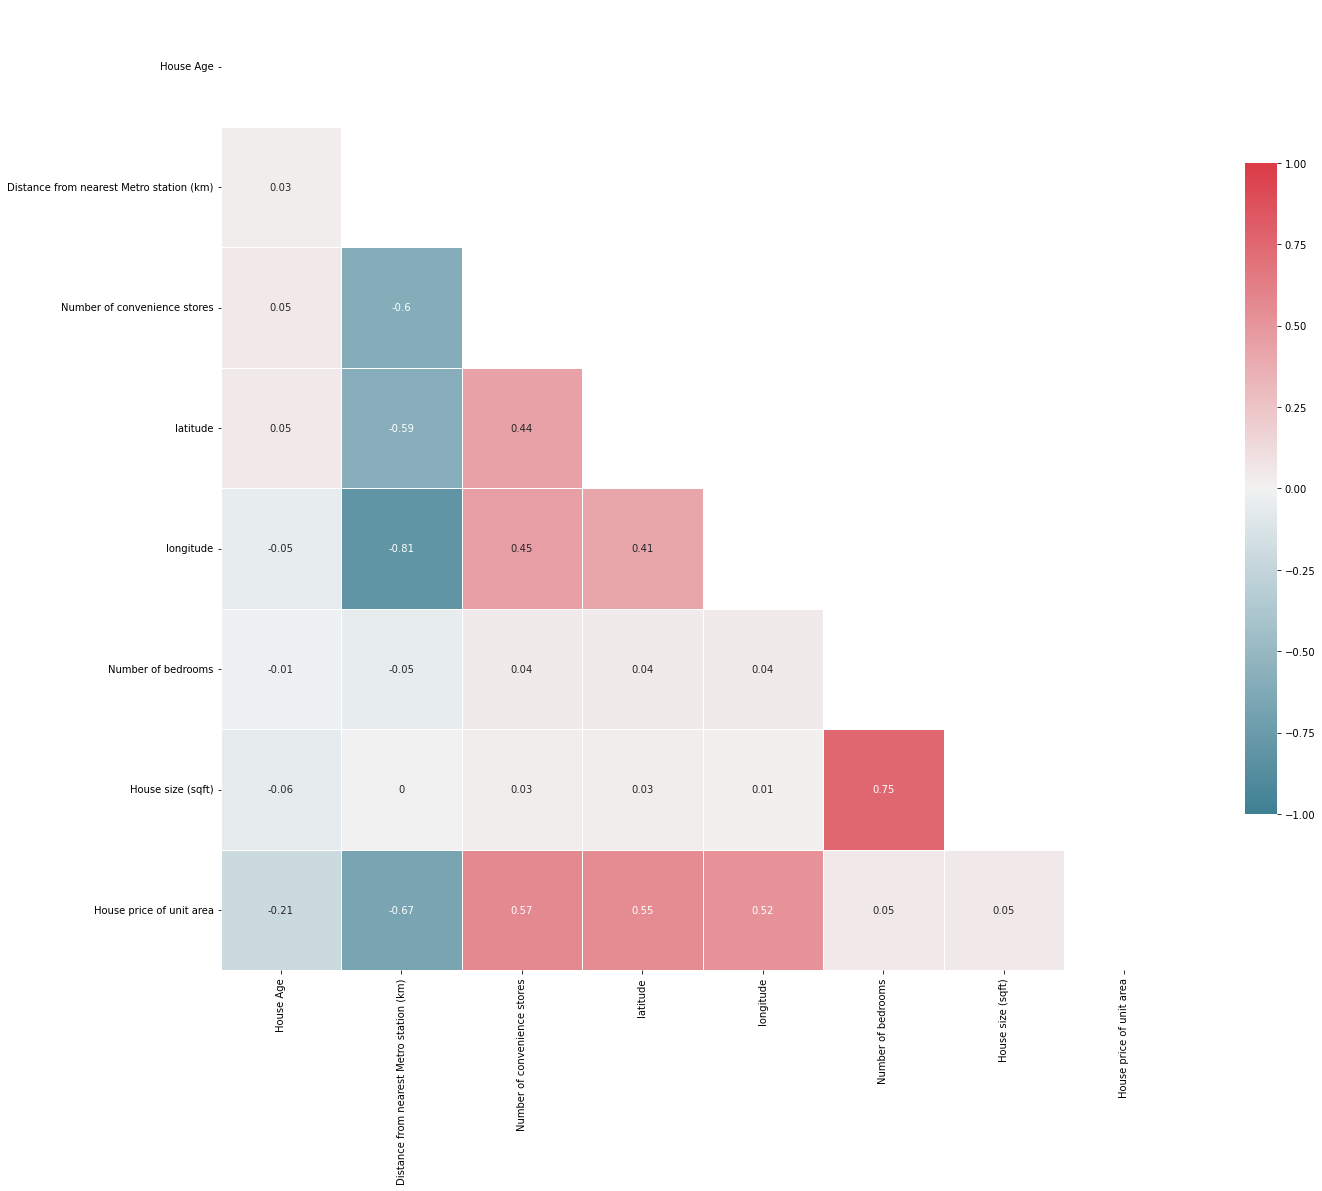

In [12]:
# Generating and visualizing the correlation matrix
dfc = df.corr().round(2)
# Masking for the upper triangle
mask = np.zeros_like(dfc, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Setting figure size
f, ax = plt.subplots(figsize=(20, 20))
# Defining custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Drawing the heatmap
sns.heatmap(dfc, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
 square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

From the Correlation Matrix we can see that House price of unit area is directly correlated with latitude, longitude & Number of convenience stores and inversely correlated with Distance from nearest Metro station (km), House Age columns.

In [13]:
# Encoding the categorical variable

In [14]:
df=pd.get_dummies(df,columns=['Number of bedrooms'], drop_first = True)

In [15]:
df

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,House size (sqft),House price of unit area,Number of bedrooms_2,Number of bedrooms_3
0,32.0,84.87882,10,24.98298,121.54024,575,37.9,0,0
1,19.5,306.59470,9,24.98034,121.53951,1240,42.2,1,0
2,13.3,561.98450,5,24.98746,121.54391,1060,47.3,0,1
3,13.3,561.98450,5,24.98746,121.54391,875,54.8,1,0
4,5.0,390.56840,5,24.97937,121.54245,491,43.1,0,0
...,...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,803,15.4,0,1
410,5.6,90.45606,9,24.97433,121.54310,1278,50.0,1,0
411,18.8,390.96960,7,24.97923,121.53986,503,40.6,0,0
412,8.1,104.81010,5,24.96674,121.54067,597,52.5,0,0


In [16]:
# Shifting column 'Name' to first position
first_column = df.pop('House price of unit area')
  
# Inserting column using insert(position,column_name,
# first_column) function
df.insert(8, 'House price of unit area', first_column)

display(df)

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,House size (sqft),Number of bedrooms_2,Number of bedrooms_3,House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,575,0,0,37.9
1,19.5,306.59470,9,24.98034,121.53951,1240,1,0,42.2
2,13.3,561.98450,5,24.98746,121.54391,1060,0,1,47.3
3,13.3,561.98450,5,24.98746,121.54391,875,1,0,54.8
4,5.0,390.56840,5,24.97937,121.54245,491,0,0,43.1
...,...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,803,0,1,15.4
410,5.6,90.45606,9,24.97433,121.54310,1278,1,0,50.0
411,18.8,390.96960,7,24.97923,121.53986,503,0,0,40.6
412,8.1,104.81010,5,24.96674,121.54067,597,0,0,52.5


In [17]:
# Separating Dependent and Independent variables

In [18]:
X = df.iloc[:,0:8].values
y = df.iloc[:,-1:].values
y

array([[ 37.9],
       [ 42.2],
       [ 47.3],
       [ 54.8],
       [ 43.1],
       [ 32.1],
       [ 40.3],
       [ 46.7],
       [ 18.8],
       [ 22.1],
       [ 41.4],
       [ 58.1],
       [ 39.3],
       [ 23.8],
       [ 34.3],
       [ 50.5],
       [ 70.1],
       [ 37.4],
       [ 42.3],
       [ 47.7],
       [ 29.3],
       [ 51.6],
       [ 24.6],
       [ 47.9],
       [ 38.8],
       [ 27. ],
       [ 56.2],
       [ 33.6],
       [ 47. ],
       [ 57.1],
       [ 22.1],
       [ 25. ],
       [ 34.2],
       [ 49.3],
       [ 55.1],
       [ 27.3],
       [ 22.9],
       [ 25.3],
       [ 47.7],
       [ 46.2],
       [ 15.9],
       [ 18.2],
       [ 34.7],
       [ 34.1],
       [ 53.9],
       [ 38.3],
       [ 42. ],
       [ 61.5],
       [ 13.4],
       [ 13.2],
       [ 44.2],
       [ 20.7],
       [ 27. ],
       [ 38.9],
       [ 51.7],
       [ 13.7],
       [ 41.9],
       [ 53.5],
       [ 22.6],
       [ 42.4],
       [ 21.3],
       [ 63.2],
       [

In [19]:
# Splitting the Dataset in Train and Test

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101,shuffle=True)

                                                 Using Multiple Linear Regression Model

In [21]:
# Fitting the model >> Multiple Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = mlr.predict(X_test)

In [23]:
# Evaluating the Model

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(mlr.coef_)-1)*(1 - r2)

print("Root Mean Squared Error value is {}".format(rmse))
print()
print("R Squared value is {}".format(r2))
print()
print("Adjusted R Squared value is {}".format(adj_r2))


Root Mean Squared Error value is 7.058621391223879

R Squared value is 0.6366169894961721

Adjusted R Squared value is 0.6357349918978618


C:\Users\sangita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

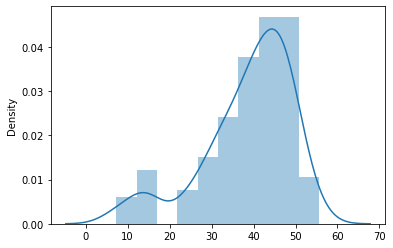

In [25]:
# checking difference between labled y and predicted y
sns.distplot(y_pred)

In [26]:
# Forming Dataframe
House_Data_MLR = pd.DataFrame({'Real Values': y_test.reshape(-1), 'Predicted Values': y_pred.reshape(-1)})
House_Data_MLR 

,Real Values,Predicted Values
0,19.2,14.284973
1,11.2,7.347903
2,24.7,23.248177
3,46.1,48.989598
4,31.3,31.280845
...,...,...
132,40.1,44.554761
133,49.0,48.013689
134,59.0,51.998081
135,21.4,37.237447


In [27]:
# Storing into the excel file
House_Data_MLR.to_excel("Prediction_MLR.xlsx")

                                                Using Decision Tree Regression Model

In [28]:
# Fitting the model >> Decision Tree Regression

In [29]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [30]:
# Fit regression model
regr = DecisionTreeRegressor(random_state = 0) 
regr.fit(X_train, y_train)

# Predict
y_pred_regr = regr.predict(X_test)

In [31]:
# Evaluating the Model

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred_regr))

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_regr)

print("Root Mean Squared Error value is {}".format(rmse))
print()
print("R Squared value is {}".format(r2))


Root Mean Squared Error value is 9.23550353513252

R Squared value is 0.3779203415115402


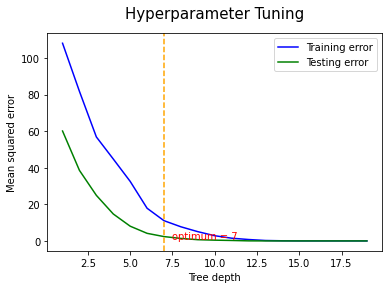

In [33]:
# Performing Hyperparameter Tuning
from sklearn.metrics import mean_squared_error as mse

max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X_train, y_train)
    training_error.append(mse(y_train, model_1.predict(X_train)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_test, y_test)
    testing_error.append(mse(y_test, model_2.predict(X_test)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=7, color='orange', linestyle='--')
plt.annotate('optimum = 7', xy=(7.5, 1.17), color='red')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.savefig('error.png')

In [34]:
# Fit regression model
regr = DecisionTreeRegressor(random_state = 0, max_depth = 7) 
regr.fit(X_train, y_train)

# Predict
y_pred_regr = regr.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred_regr))

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_regr)

print("Root Mean Squared Error value is {}".format(rmse))
print()
print("R Squared value is {}".format(r2))

Root Mean Squared Error value is 8.747020140852076

R Squared value is 0.4419859990953041


C:\Users\sangita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

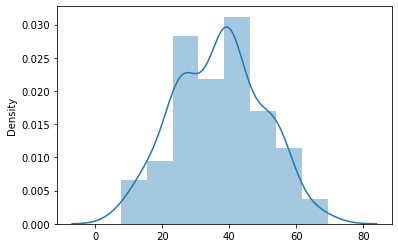

In [36]:
# checking difference between labled y and predicted y
sns.distplot(y_pred_regr)

In [37]:
# Forming Dataframe
House_Data_DTR = pd.DataFrame({'Real Values': y_test.reshape(-1), 'Predicted Values': y_pred_regr.reshape(-1)})
House_Data_DTR

,Real Values,Predicted Values
0,19.2,22.100000
1,11.2,22.600000
2,24.7,25.584444
3,46.1,46.600000
4,31.3,25.584444
...,...,...
132,40.1,38.150000
133,49.0,36.900000
134,59.0,55.942857
135,21.4,25.584444


In [38]:
# Storing into the excel file
House_Data_DTR.to_excel("Prediction_DTR.xlsx")

So, after performing predictive modeling we can see our Multiple Linear Regression Model has performed better compared to Decision Tree Regression Model in terms of Root Mean Squared Error value and R Squared value. 

C:\Users\sangita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'frequency')

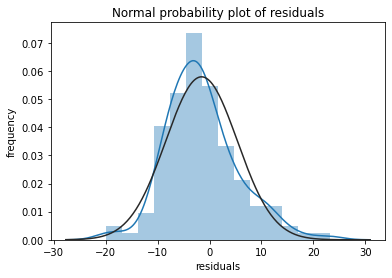

In [39]:
# Checking for the distrbution for MLR

from scipy.stats import norm

residual = y_test-y_pred 

sns.distplot(residual , fit=norm)
plt.title("Normal probability plot of residuals")
plt.xlabel("residuals")
plt.ylabel("frequency")

C:\Users\sangita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'frequency')

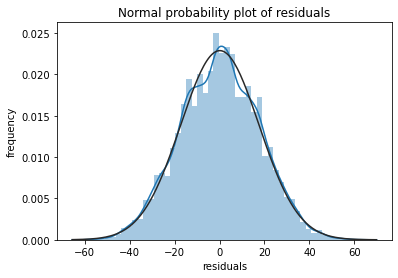

In [40]:
# Checking for the distrbution for DTR

from scipy.stats import norm

residual = y_test-y_pred_regr

sns.distplot(residual , fit=norm)
plt.title("Normal probability plot of residuals")
plt.xlabel("residuals")
plt.ylabel("frequency")

In [41]:
# Detecting Multicollinearity with VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = df[['House Age', 'Distance from nearest Metro station (km)', 'Number of convenience stores', 'latitude', 'longitude', 'House size (sqft)', 'Number of bedrooms_2', 'Number of bedrooms_3']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,House Age,3.500149e+00
1,Distance from nearest Metro station (km),2.993230e+00
2,Number of convenience stores,4.782420e+00
3,latitude,5.923449e+06
4,longitude,5.922515e+06
5,House size (sqft),3.852080e+01
6,Number of bedrooms_2,7.693515e+00
7,Number of bedrooms_3,7.136713e+00


Drawbacks :
    
Multiple Linear Regression Model : 
  1) We know that Multiple Linear regression assumes linear relationship between independent                                         variables and dependent variables. So, Multiple Linear regression will not be good at                                           explaining the relationship of the independent variables to the dependent variables if
                                      those relationships are not linear.
                                      
  2) The assumption of linear regression is all the residuals or error terms should be normally                                       distributed. If residuals are non-normally distributed, the estimation may become too
                                      wide or narrow.
                                      
  3) The assumption of linear regression is that there should be less or no multicollinearity
                                      in the given dataset. So, in this case we have less multicollinearity between independent
                                      variables. 
                                      
                                      

Drawbacks :
    
Decision Tree Regression Model :
    
 1) For a Decision tree sometimes calculation can go far more complex compared to other algorithms.
    
 2) Relationships between continuous predictors and outcome are piecewise flat.
    
 3) It can be useful in a lot of areas where the relationship between the variables are found to be non-linear, which is not that much present in the dataset variables so performance is not well.
    
 4) It have a tendency to overfit and have a poor generalization.
    


 So, on the basis of model performance and drawbacks of each technique's assumptions I am recommending Multiple Linear Regression Model as the final prediction model.
_____________________________